# Passo a passo do algoritmo busca de caminho mínimo

- Crie uma fila Q vazia.
- Crie uma lista de vértices visitados para acompanhar os vértices visitados.
- Crie um dicionário para acompanhar a distância dos vértices do vértice de origem. 
- Inicialize as distâncias com o valor máximo.
- Insira o vértice de origem em Q e vértices_visitados.
- Se Q estiver vazio, retorne. Caso contrário, prossiga. (*)
- Retire um vértice v de Q.
- Atualize as distâncias dos vizinhos não visitados de v no dicionário.
- Insira os vizinhos não visitados em Q e vértices_visitados.
- Repita o processo acima até que a condição em (*) seja satisfeita.

In [ ]:
from queue import Queue

class Grafo:

    def __init__(self, vertices, arestas):

        self.vertices = vertices
        self.arestas = arestas

    def converterStringInt(self):

        v_list = []
        index = []

        for i in self.vertices:
            v_list.append(i)
            index.append(v_list.index(i))

        return index, v_list

    def mapearStringInt(self, index, v_list, vertice):

        i = 0
        for u in v_list:
            if (u == vertice):
                return index[i]
            i += 1

    def obterAdjacentesNoGrafo(grafo):

        Adjacentes = []

        for vertice in grafo.vertices:
            Adj = []

            for u,v in grafo.arestas:

                if (u == vertice):
                    Adj.append(v)
                elif (v == vertice):
                    Adj.append(u)

            Adjacentes.append(Adj)

        return Adjacentes

def busca_min(grafo, v):

    Q = Queue()
    distancia_dict = {k: 999999999 for k in grafo.vertices}
    Q.put(v)

    vertices_visitados = list()
    vertices_visitados.append(v)
    Adjacentes = grafo.obterAdjacentesNoGrafo()

    index, v_list = grafo.converterStringInt()
    while not Q.empty():

        vertice = Q.get()
        if vertice == v:
            distancia_dict[vertice] = 0

        i = grafo.mapearStringInt(index, v_list, vertice)
        for u in Adjacentes[i]:
            if u not in vertices_visitados:
                if distancia_dict[u] > distancia_dict[vertice] + 1:
                    distancia_dict[u] = distancia_dict[vertice] + 1
                Q.put(u)
                vertices_visitados.append(u)

    return distancia_dict

def calcular_distancia(grafo, v1, v2):

    distancia_dict = busca_min(grafo, v1)
    return distancia_dict.get(v2)

def calcular_excentricidade(grafo, v1):

    excentricidade = {v1: 0}
    distancia_dict = busca_min(grafo, v1)
    excentricidade[v1] = max(distancia_dict.values())

    return excentricidade

def determinar_centros(grafo):

    excentricidade = {k: 0 for k in grafo.vertices}
    for vertice in grafo.vertices:
        distancia_dict = busca_min(grafo, vertice)
        excentricidade[vertice] = max(distancia_dict.values())

    # print("Excentricidade do Grafo: ", excentricidade)
    valor_min = min(excentricidade.values())
    centros = {k: v for k, v in excentricidade.items() if v == valor_min}

    return centros

if __name__ == '__main__':

    v_arv = ["A", "B", "C", "D", "E", "F", "G", "H"]
    e_arv = {('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'E'), ('C', 'F'), ('E', 'G'), ('E', 'H')}

    GArv = Grafo(v_arv, e_arv)
    dist = calcular_distancia(GArv, "A", "F")
    print("Distancia entre 'A' e 'F': ", dist)

    dist = calcular_distancia(GArv, "C", "H")
    print("Distancia entre 'C' e 'H': ", dist)

    excentricidade = calcular_excentricidade(GArv, "A")
    print("Excentricidade do vertice A: ", excentricidade)

    centros = determinar_centros(GArv)
    print("Centros do Grafo: ", centros)

    print("\n")

    v_art = ['Bennedict Cumberbatch', 'Chris Evans', 'Chris Hemsworth', 'Elizabeth Oslen', 'Gwyneth Paltrow',
             'Jeremy Renner', 'Mark Ruffalo', 'Paul Bettany', 'Robert Downey Jr', 'Samuel L. Jackson',
             'Scarllet Johansson', 'Tom Holland']

    e_art = {('Bennedict Cumberbatch', 'Chris Hemsworth'), ('Chris Evans', 'Elizabeth Oslen'), ('Chris Evans', 'Samuel L. Jackson'),
             ('Chris Evans', 'Scarllet Johansson'), ('Chris Hemsworth', 'Jeremy Renner'), ('Chris Hemsworth', 'Mark Ruffalo'), ('Chris Hemsworth', 'Samuel L. Jackson'),
             ('Elizabeth Oslen', 'Robert Downey Jr'), ('Gwyneth Paltrow', 'Robert Downey Jr'), ('Gwyneth Paltrow', 'Scarllet Johansson'),
             ('Gwyneth Paltrow', 'Tom Holland'), ('Mark Ruffalo', 'Robert Downey Jr'), ('Paul Bettany', 'Robert Downey Jr'),
             ('Robert Downey Jr', 'Scarllet Johansson'), ('Robert Downey Jr', 'Samuel L. Jackson'), ('Robert Downey Jr', 'Tom Holland')}

    GArtistas = Grafo(v_art, e_art)
    dist = calcular_distancia(GArtistas, "Bennedict Cumberbatch", "Chris Hemsworth")
    print("Distancia entre Bennedict Cumberbatch e Chris Hemworth: ", dist)

    dist = calcular_distancia(GArtistas, "Bennedict Cumberbatch", "Elizabeth Oslen")
    print("Distancia entre Bennedict Cumberbatch e Elizabeth Oslen: ", dist)

    excentricidade = calcular_excentricidade(GArtistas, "Bennedict Cumberbatch")
    print("Excentricidade do vertice Bennedict Cumberbatch: ", excentricidade)

    centros = determinar_centros(GArtistas)
    print("Centros do Grafo: ", centros)

Distancia entre 'A' e 'F':  2
Distancia entre 'C' e 'H':  4
Excentricidade do vertice A:  {'A': 3}
Excentricidade do Grafo:  {'A': 3, 'B': 3, 'C': 4, 'D': 4, 'E': 4, 'F': 5, 'G': 5, 'H': 5}
Centros do Grafo:  {'A': 3, 'B': 3}


Distancia entre Bennedict Cumberbatch e Chris Hemworth:  1
Distancia entre Bennedict Cumberbatch e Elizabeth Oslen:  4
Excentricidade do vertice Bennedict Cumberbatch:  {'Bennedict Cumberbatch': 4}
Excentricidade do Grafo:  {'Bennedict Cumberbatch': 4, 'Chris Evans': 3, 'Chris Hemsworth': 3, 'Elizabeth Oslen': 4, 'Gwyneth Paltrow': 4, 'Jeremy Renner': 4, 'Mark Ruffalo': 3, 'Paul Bettany': 4, 'Robert Downey Jr': 3, 'Samuel L. Jackson': 2, 'Scarllet Johansson': 4, 'Tom Holland': 4}
Centros do Grafo:  {'Samuel L. Jackson': 2}


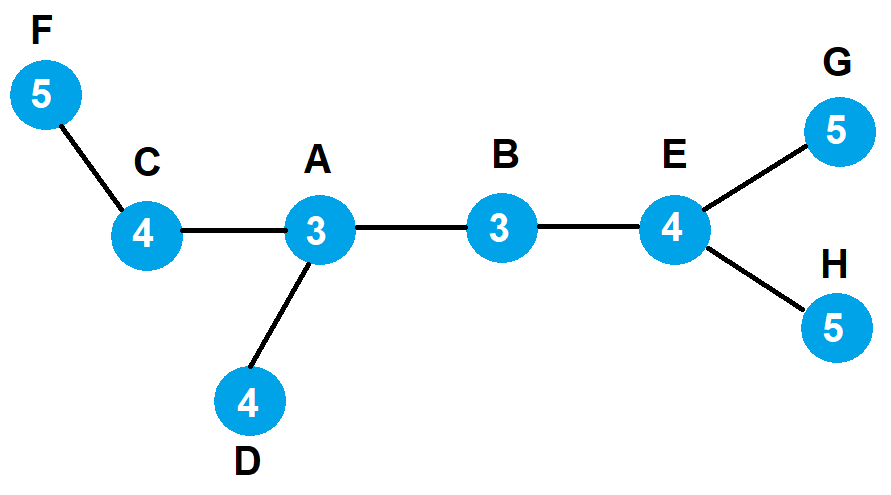

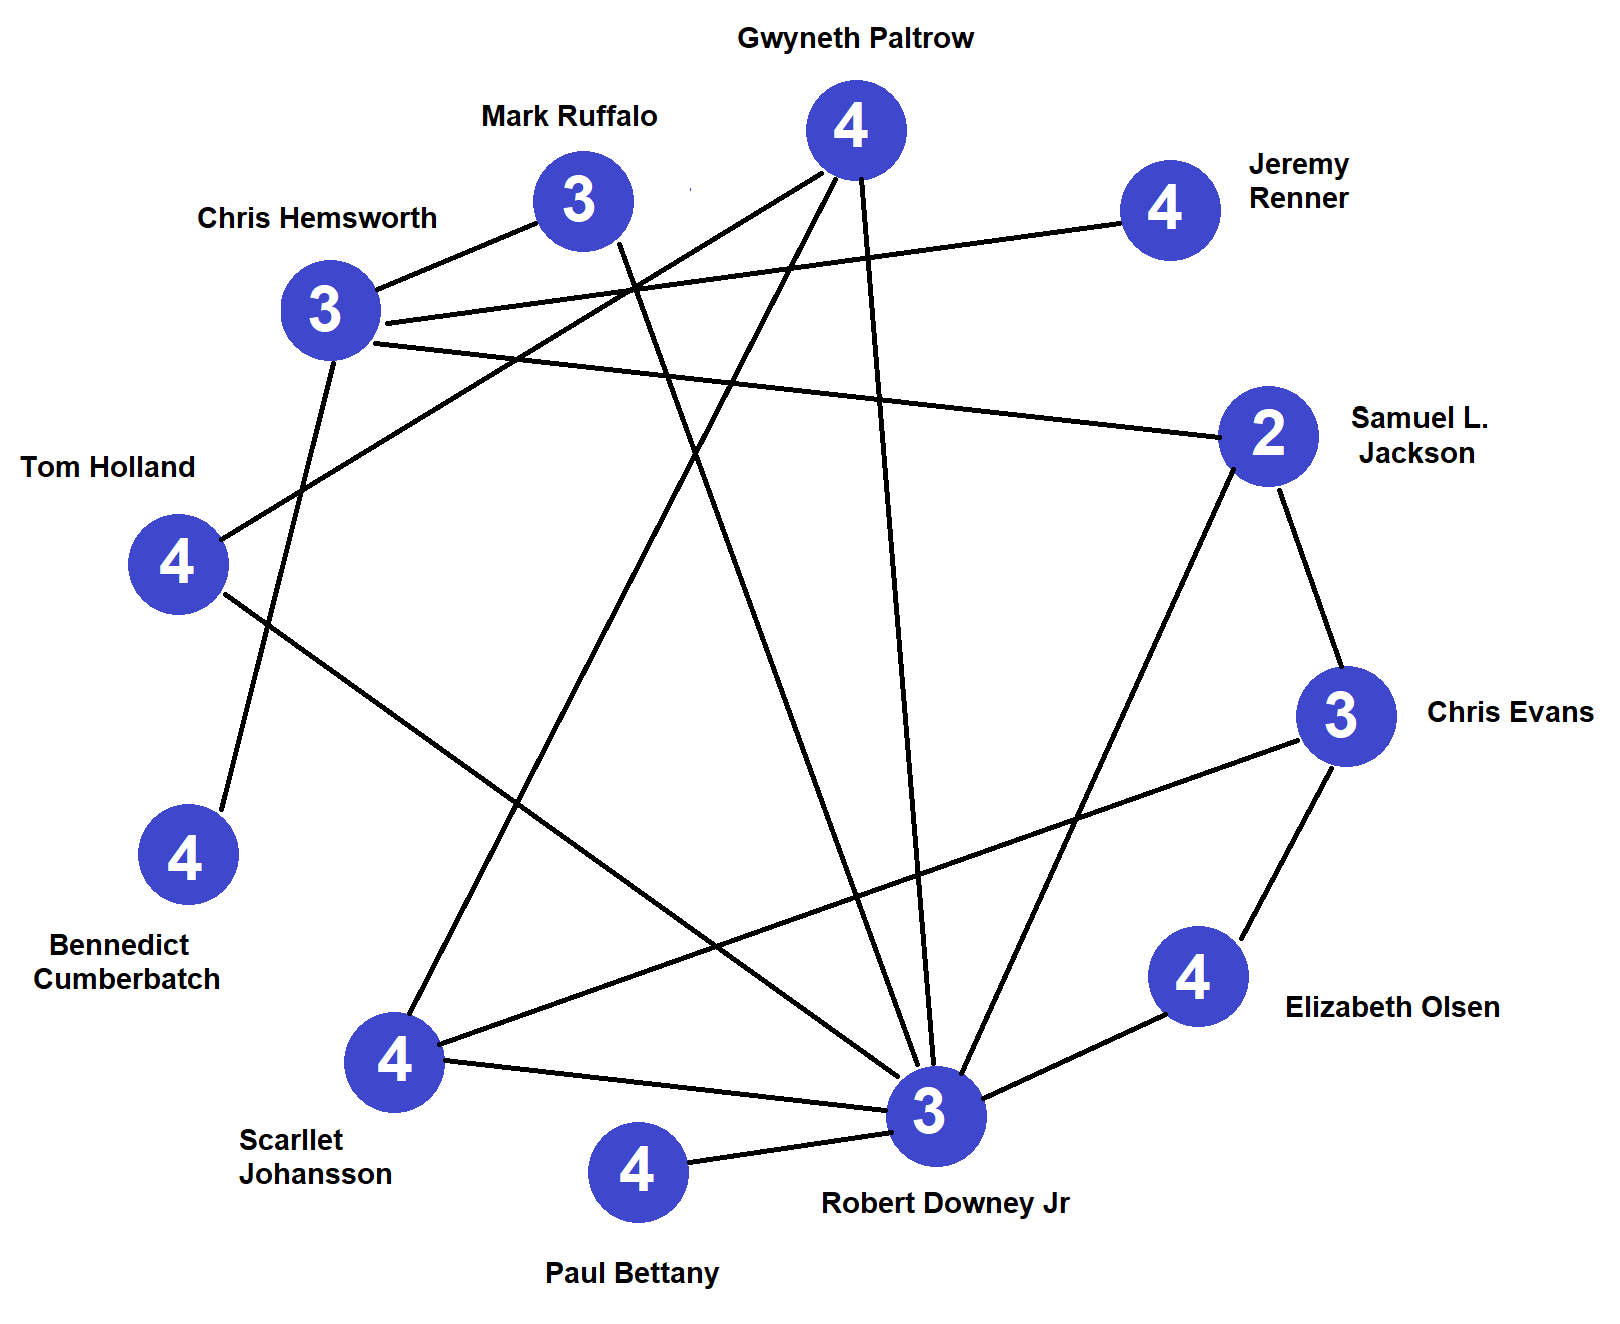